#**Correction TP1: Regression and Regularization**

In this course you will learn : 
- how the Linear Regression model works and how to train it
- some regularization techniques
- how to use `scikit-learn`


*Nota Bene:* For further informations, the reader is encouraged to look at the notebooks by Aurélien Géron on [github](https://github.com/ageron/handson-ml) as well as the associated book:

> Géron, Aurélien. *Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems.* O'Reilly Media, Inc., 2017.

# **I - Linear Regression**

## *1) Introduction*

Regression is one of the most simple ways to **create a link between inputs X and outputs Y** (supervised learning), i.e. predict some outputs knowing some inputs. The simplest regression function is a linear function : 

> $$\boxed{Y =  X \beta }$$

This is a linear regression, where $\beta$ is the vector of model parameters. It assumes a linear link between inputs and outputs. If we plot the independent variable (X) on the x-axis and dependent variable (Y) on the y-axis, the linear regression gives us a straight line that best fits the data points, as shown in the figure below. If the inputs are 2d, the linear function will represent a plane and for higher dimensions it will be an hyper plane. 

<center> <img alt="linear_reg" src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/1920px-Linear_regression.svg.png" width="400"> </center>

## 2) *Estimating the model coefficients*



Suppose that data are $n$ observations $\{x_i, y_i \}$ of the output vector $Y$ of the problem, where $x_i$ is the input which can contain multiple predictors, including the constant 1. For instance $p+1$ predictors can be obtained using simple powers of the input $x_i$:

> $$ x_i = [1,~ x_i^1,~ x_i^2,~ ...,~ x_i^{p}]$$

Based on the assumption that a linear function links the inputs to the outputs, our goal is to estimate the model coefficients $\hat \beta$. Thus, the outputs prediction $\hat Y$ will be:

> $$\hat Y =  X \hat \beta$$ and $$Y =  X \hat \beta + \epsilon$$

where $\epsilon = Y - \hat Y$ is the error. Training the Linear Regression model will then consist in finding the value of $\hat \beta$ that best fits the training data. For this purpose, we need an evaluation of how well the model performs on this data.

### a) Evaluation criterion


To evalute the accuracy of the model, the **coefficient of determination $R^2$** is isually computed, which corresponds to the variance explained by the model $Var(\hat Y) = \frac{1}{n}\sum_{i=1}^n (\hat Y - \bar Y)^2$ compared with the total variance of the output $Var(Y) = \frac{1}{n}\sum_{i=1}^n (Y - \bar Y)^2$ :

> $$ R^2 = \frac{Var(\hat Y)}{Var(Y)} = \frac{\sum_{i=1}^n (\hat Y - \bar Y)^2}{\sum_{i=1}^n (Y - \bar Y)^2} $$

This factor is associated to the well-known **Mean Square Error (MSE)**, a classical indicator of the accuracy of a model in machine learning:

> $$ \boxed{MSE = \frac{1}{n} {\sum_{i=1}^n (Y - \hat Y)^2} }$$

With the following link:

> $$ R^2 = 1 - \frac{MSE}{Var(Y)} $$

Depending on the value of $R^2$, the accuracy of the linear model can be assessed :
- A good accuracy is obtained when $R^2$ is close to 1, meaning that the MSE is close to 0 : the model explains well the variance of the output data
- A bad accuracy is obtained when $R^2 < 0.9$, meaning that the MSE is no more 0 : only a part of the total variance is explained by the model

Therefore, the model training seek for the value of $\hat \beta$ that minimizes the MSE or equivalently that get the $R^2$ value as close as 1 as possible. Many different ways exist to estimate $\hat \beta$. Among them, we find an analytical method called the normal equation.

### b) An analytical method: the normal equation

The normal equation gives a direct analytical form to compute the optimal value of $\hat \beta$.

For the sake of simplicity, suppose that we first look for an affine estimation of the output $Y$ using only one input $X^1$, so that for $i=1..n$, $x_i = [1,~x_i^1]$. The linear model reads 

> $$ \hat Y = X \begin{bmatrix} \hat \beta_0 \\ \hat \beta_1 \end{bmatrix} =  \begin{bmatrix} 1,~x_1^1 \\ ... \\ 1,~x_n^1 \end{bmatrix} \begin{bmatrix} \hat \beta_0 \\ \hat \beta_1 \end{bmatrix} = \begin{bmatrix} y_i \\ ... \\ y_n \end{bmatrix} $$

The above equation is the matrix form of the linear relation $y_i = \hat \beta_0 + \hat \beta_1 x_i^1 $

If the problem is well-posed, i.e. the number of observations is exactly the number of coefficients to estimate (i.e. $n = 2$ here), then the matrix $X$ is squared, and can be invertible (since the several input predictors should be independent from one to the another). It yields the estimation $\hat \beta = X^{-1} Y$. However, in many regression problems, the number of observations is large compared with the number of inputs, i.e. $n>>p$ : the problem is **overdetermined**. Thus the matrix $X$ is not invertible, and an other approach has to be found. By multiplying by $X^t$, where $^t$ denotes the transpose, and noting that $X^tX$ is a squared invertible matrix, it yields the **normal equation** from which the coefficients' estimation can be obtained:

> $$ \boxed{\hat \beta = (X^t X)^{-1} X^t Y}$$

where $I_F = X^tX$ is often called the **Fisher Information Matrix (FIM)**

### c) The LR as an optimization problem

The normal equation was obtained intuitively using alebra, yet it hides the proper nature of the underlying problem. Moreover the idea in this course is also to **make a link between the linear regression technique and machine learning problems**. Thus, a rigorous way to derive the normal equation is to view the linear regression as an **optimization problem**: "*the models' coefficients are obtained as the ones who are minimizing the error (here the MSE) between the estimated and true outputs*". In other words:

$$\hat \beta = min_\beta \| Y - \hat Y(\beta) \|^2$$

The quantity to optimize is therefore the sum of the square difference (the least square), which reads:

$$ \| \mathcal{E} \|^2 =  \| Y - \hat Y(\beta) \|^2 = (Y - X \beta)^t(Y-X\beta) = Y^tY - (X \beta)^t Y - Y^t(X\beta) + (X \beta)^t(X \beta)$$

The solution of the minimization problem applied to this quantity of interest is obtained by taking the null derivative, so that

$$\frac{\partial \| \mathcal{E} \|^2}{\partial \beta} = 0 = -2X^tY + 2 X^tX \beta$$

which is the **normal equation** that we obtained previously. This demonstration falls into the more general context of **maximization of the likelyhood** function. Note that the **variance** of our estimator $\hat \beta$ is proportional to $\sigma^2 \left( [X^tX]^{-1} \right)_{ii}$, i.e. is **determined by the FIM**, which only depends on the model's inputs. It suggests that **choosing the features or inputs is crucial** for the linear regresion: this is in fact crucial in any machine learning problems!

## *3) Example of application on synthetic data*

Now, let's look at an example with known synthetic data obtained by the analytical formula $y_i = 1.5 + 2 x_i + 5 x_i^2 + \epsilon~$ in the domain $[-1,~1]$, where $\epsilon$ is a gaussian noise.

In [4]:
# Here is a short example of a linear regression implementation 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Parameters
beta0 = 1.5
beta1 = 2.0
beta2 = 5.0
epsilon = 0.5
np.random.seed(17) # deterministic random generation 

# Some 100 noisy observations
x = np.arange(-1.0, 1.0, 2/100)
noise = np.random.normal(0, epsilon, x.size)
y = beta0 + beta1*x + beta2*x*x + noise

# Transpose to vectors
obs_x = x.reshape((-1,1))
obs_y = y.reshape((-1,1))

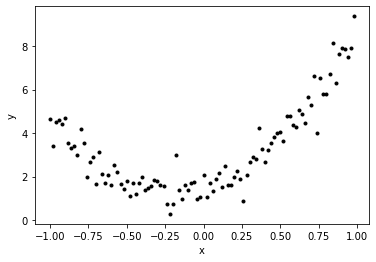

In [5]:
plt.subplots_adjust(wspace = 0.5)
plt.plot( obs_x, obs_y, 'k.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Now, let's try to implement the linear regression to estimate the model coefficients. We will start by `classical` inputs, so here by choosing the solution as a projection on the polynomial basis $\{1, X, X^2, ..., X^N \}$, where $N$ can be modified in the following code.

---
**EXERCISE 1**

*1a*.   Recall how the matrix $X$ (denoted `X_train` in the following code) is built. This matrix is already implemented, so only its mathematical form and ingredients are requested here. How is the associated FIM (the code is displaying this matrix)?

*1b*.   Knowing the model coefficients obtained by the linear regression (*Beta_lr*) and the model inputs (*X_train*), implement the prediction *y_pred*.

*Hint :* For a polynome of order 2, you want an input containing obs_x<sup>0</sup>, obs_x<sup>1</sup> and obs_x<sup>2</sup>

*1c*.   How the model accuracy evolves when the polynomial order $N$ is increased (up to 30) ? (Solution : The model accuracy increase for low order and then start to decrease when the order is bigger than around 25)

---



Beta0=3.236  Beta1=2.103  Beta2=3.539  Beta3=0.06296  Beta4=0.1826  Beta5=0.1275  Beta6=0.1895  Beta7=0.5444  Beta8=-0.0853  Beta9=0.09935  Beta10=0.071  Beta11=0.3486  Beta12=0.5349  Beta13=0.3662  Beta14=0.2588  Beta15=-0.04236  
R2 = 0.930728


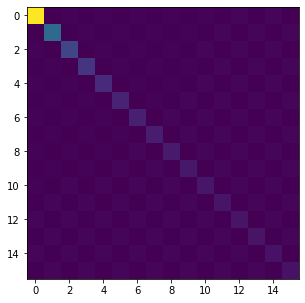

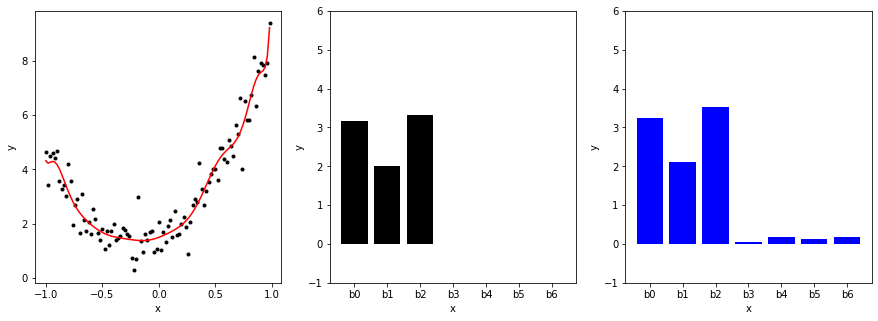

In [23]:
from scipy.special import legendre 
import matplotlib.cm as cm

typeLR = 'legendre' # either classical or legendre
pruning = False

N = 15 # Polynomial of order N
X_train = obs_x**0
for i in range(1,N+1):
  ## Classical regression
  if typeLR == 'classical':
    X_train = np.concatenate((X_train, obs_x**i), axis=-1)
    trueLR = [1.5, 2, 5, 0, 0, 0, 0]
  if typeLR == 'legendre':
  ## Legendre exercise 2b
    Pn = legendre(i)
    X_train = np.concatenate((X_train, Pn(obs_x)), axis=-1)
    trueLR = [19/6, 2, 10/3, 0, 0, 0, 0]

Fisher = np.dot(np.transpose(X_train), X_train)
Inv_Fisher = np.linalg.inv(Fisher)
IFX = Inv_Fisher.dot(np.transpose(X_train)) #(XtX^-1)Xt
Beta_lr = IFX.dot(obs_y)
# Pruning
if pruning: Beta_lr[Beta_lr < 1.0] = 0

# Display the Fisher matrix
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
#plt.imshow(Fisher, cmap=cm.jet, interpolation='nearest')
im = ax.imshow(Fisher)
if N < 11:
  for i in range(N+1):
      for j in range(N+1):
          text = ax.text(j, i, "%.1f" % Fisher[i, j],
                        ha="center", va="center", color="w")

# Predict the outputs knowing the input X_train and the estimated coefficients Beta_lr
y_pred = X_train.dot(Beta_lr)  #(TO BE IMPLEMENTED, EXERCICE 1b)

# Compute the R2 coefficient
R2 = 1 - np.var(obs_y - y_pred)/np.var(obs_y) 

# Print the estimated coefficients and the R2 score
for num, coef in enumerate(Beta_lr[:, 0]): 
  print (f"Beta{num}={coef:.4} ", end=' ')

print(f"\nR2 = {R2:.6}")

# Plot the Y predictions
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
plt.plot(obs_x, obs_y, 'k.')
plt.plot(obs_x, y_pred, 'r-')
plt.xlabel('x')
plt.ylabel('y')

label = ['b0','b1', 'b2', 'b3', 'b4', 'b5', 'b6']
plt.subplot(1,3,2)
plt.bar(label, trueLR, color='k')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-1, 6])

Beta_lr.resize(7, 1)

plt.subplot(1,3,3)
plt.bar(label, Beta_lr[0:7, 0], color='b')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-1, 6])

plt.show()

## *4) Additionnal notes on Linear Regression*

- The **linear** regression refers to the linearity regarding the stochastic model parameter $\beta$, and not to the linearity of the input parameters. For instance, the model $y_i = \beta_0 + \beta_1 x_i + \beta_2 (x_i)^2$ is linear, whereas the model $y_i = \beta_0/(\beta_1 + \beta_2 x_i)$ is non-linear.

- Functions of inputs can be incorporated into the linear regression model, such as the model presented before $y_i = \beta_0 + \beta_1 x_i + \beta_2 (x_i)^2$, or more complex functions such as $e^{x_i}$ or $cos(x_i)$. It can be recast in the linear regression problem in the matrix form $Y = X \beta$, for instance using the input matrix $X =  \begin{bmatrix} 1,~x_1,~x_1^2 \\ ... \\ 1,~x_n,~x_n^2 \end{bmatrix}$. Keep in mind however that the predictors should be independ to ensure that the matrix $X^tX$ is invertible.

- In the linear regression, **the choice of the input parameters is crucial**. As already mentioned, polynomials based on the $x_i$'s, or even more complex functions (exponential, logarithm etc.) can be used. It means that these **features** have to be manually chosen in such a regression method. In the second part of this module, **you will discover model-free approaches, such as Deep Learning, where these features will be found automatically during the training phase**. 

- An example of feature engineering is provided by the choice of the polynomial basis used for the linear regression. Compared with the classical basis choice $\{1,~X,~X^2,~X^3,~etc.\}$, an orthogonal basis would be more adapted. It therefore involves some scalar products, which are weighted by the stochastic distribution governing the inputs $x_i$. For a uniform distribution in $[-1,~1]$, as it is here (otherwise, data normalization is required), the orthogonal basis is the **Legendre polynomial** $P_n(X)$, where the first polynomials are $\{1,~X,~(3X^2-1)/2,~(5X^3-3X)/2,~etc. \}$.

---
**EXERCISE 2 - The choice of features matters**

Intuitively we have chosen **features**, i.e. relevant inputs, to describe our problem: it was the basis $\{1,X, X^2, ...\}$. Let's now do another choice with the basis  $\{P_0,P_1, P_2, ...\}$ of the Legendre polynomials. Thus now, we are looking for a model which relates:

$$Y = P\beta$$ where $P$ is the matrix obtained by using the new basis (the new features). Theoretically, the problem is exactly the same, but in practice, many benefits can be observed: this is the goal of this exercise. In the previous code, you can use this new basis by seting `typeLR = 'classical'`.

*2a*.   Write our target function $y_i = 1.5 + 2 x_i + 5 x_i^2 + \epsilon~$ in the Legendre's polynomial basis (Solution : $19/6 P_0 +2 P_1 + 10/3 P_2$).

*2b*.   What happens now when the polynomial order N_tot is increased **in the previous example** (Solution : The overfitting is reduced, coefficients now match the one of the expansion even when Ntot is not the correct maximal exponent) ?  

---




# **II - Underfitting and Overfitting**

Machine Learning aims at learning features from training data while leaving aside the noise, in order to make good predictions on unseen (test) data. Therefore, **underfitting** and **overfitting** are a central point when performing Machine Learning:
- underfitting occurs when the model fails to capture the underlying trend in the data (left in the figure below)
- overfitting occurs when the model captures the underlying trend, but includes too much noise, and therefore fails to capture the general trend (right in the figure below)
- the correct capacity, or complexity, is obtained between these two scenario.

<img src="https://drive.google.com/uc?export=download&id=1qbXf-M9sacSmj_MBB1FisahU1Shmjqtr" width="600">

To monitor these phenomena and evaluate the generalization capacity of a model, **validation is always required in any machine learning problems**. To do so, the dataset is split into a **training set** which contains inputs and outputs used to train the model, and a **validation/test** dataset left unseen during the training. The error is then measured on both sets and compared.

Let's visualize the underfitting and overfitting phenomena using a simple linear regression on an analytic example, for instance $y_i = -0.25x_i + 0.7x_i^2 + 0.2 \sin(2 \pi x)$. Note that this function is an infinite polynomial. It suggests that a very high order polynomial should be required for accurate predictions ... this would be true if inputs/outputs data would have been measured without noise and uncertainties !

---
**EXERCISE 3 - Underfitting & overfitting**

*3a*.   Run the code below and change the value of `Ntot` to be 3, 7 and finally 17. What happens?

*3b*.   Using Ntot=17, increase `Ntrain` to 100 samples (insteaf ote 20 previously). What do you observe?

---

type is legendre
type is legendre
type is legendre
type is legendre
type is legendre
type is legendre
type is legendre
type is legendre
type is legendre
type is legendre


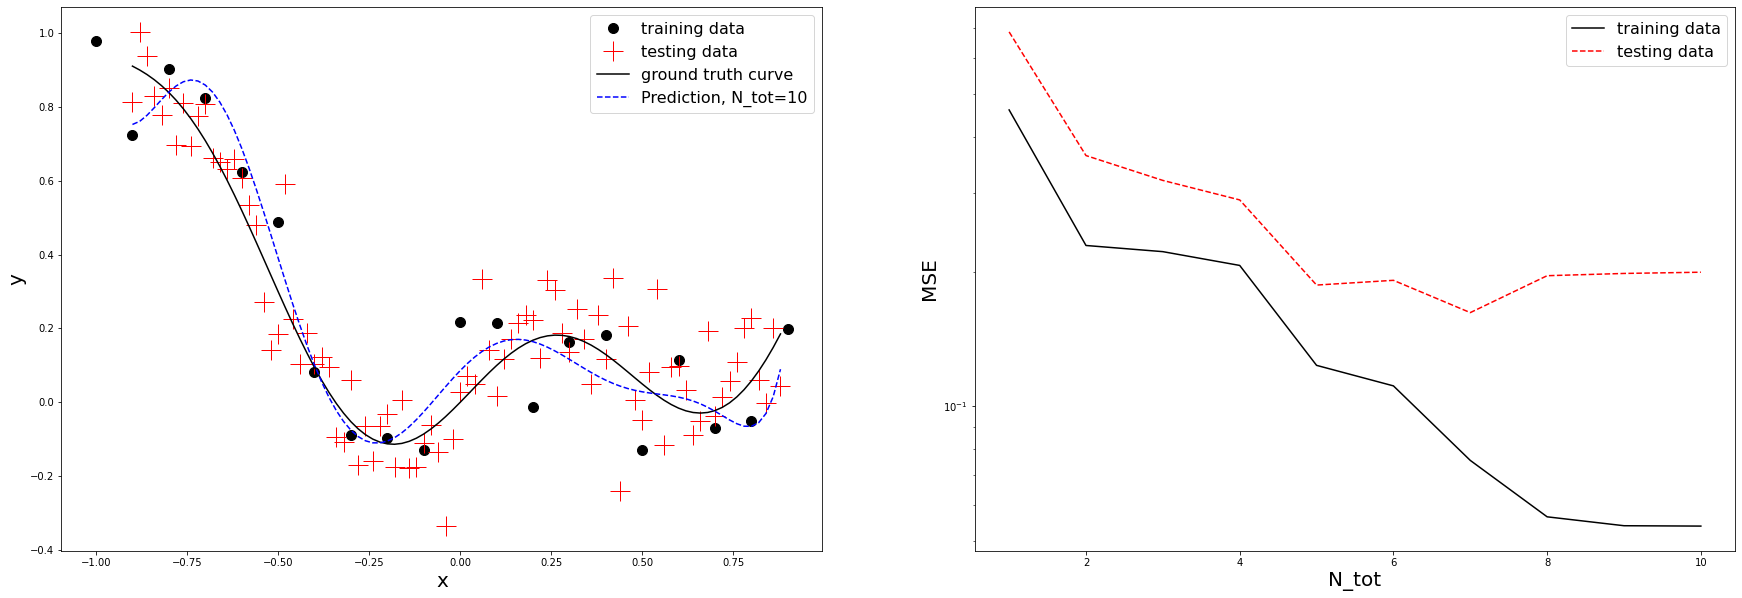

In [41]:
N_tot = 10 # Modify this parameter, the polynomial order

Ntrain, Ntest = 20, 100

typeLR = "legendre"

# Some Ntrain and Ntest noisy observations
beta0 = -0.25
beta1 = 0.7
beta2 = 0.2
NoiseAmp = 0.1
x_train = np.arange(-1.0, 1.0, 2.0/Ntrain)
x_test = np.arange(-0.9, 0.9, 2.0/Ntest)

# Noise generation
np.random.seed(17) # deterministic random generation 
noise_train = np.random.normal(0,NoiseAmp,x_train.size)
noise_test = np.random.normal(0,NoiseAmp,x_test.size)

# Y = -0.25+0.7*x^2+0.2*sin(2*pi*x)
y_train = beta0*x_train + beta1*x_train**2 + beta2*np.sin(2*np.pi*x_train) + noise_train
y_test = beta0*x_test + beta1*x_test**2 + beta2*np.sin(2*np.pi*x_test) + noise_test
y_true = beta0*x_test + beta1*x_test**2 + beta2*np.sin(2*np.pi*x_test) # no noise

# Transpose to vectors
obs_x_train = x_train.reshape((-1,1))
obs_y_train = y_train.reshape((-1,1))
obs_x_test = x_test.reshape((-1,1))
obs_y_test = y_test.reshape((-1,1))
obs_y_true = y_true.reshape((-1,1))

# Let's iterate on the polynomial order to evaluate the model performance
MSE_train = []
MSE_test = []
for nn in range(1, N_tot+1):

  # Polynomial of order N based on the training point
  X_train = np.ones(obs_x_train.shape)
  X_test = np.ones(obs_x_test.shape)
  for i in range(1,nn+1):
    if typeLR == 'classical':
      if i== 1: print("type is classical")
      X_train = np.concatenate((X_train, obs_x_train**i), axis=-1)
      X_test = np.concatenate((X_test, obs_x_test**i), axis=-1)
    if typeLR == 'legendre':
    ## Legendre exercise 2b
      if i== 1: print("type is legendre")
      Pn = legendre(i)
      X_train = np.concatenate((X_train, Pn(obs_x_train)), axis=-1)
      X_test = np.concatenate((X_test, Pn(obs_x_test)), axis=-1)
  
  # Train the linear regression model
  Fisher = np.dot(np.transpose(X_train), X_train)
  Inv_Fisher = np.linalg.inv(Fisher)
  IFX = Inv_Fisher.dot(np.transpose(X_train)) #(XtX^-1)Xt
  Beta_lr = IFX.dot(obs_y_train)

  # Predict the outputs on the train set for confirmation
  Y_train_pred = X_train.dot(Beta_lr)

  # Predict the output from the test set (unseen data)
  Y_test_pred = X_test.dot(Beta_lr)

  # Compute the R2 coefficient
  MSE_train.append(np.var(Y_train_pred - obs_y_train)/np.var(obs_y_train))
  MSE_test.append(np.var(Y_test_pred - obs_y_test)/np.var(obs_y_test))


# Plot the Y predictions
plt.figure(figsize=(30, 10))
plt.subplot(1,2,1)
plt.plot(obs_x_train, obs_y_train, 'k.', markersize=20, label='training data')
plt.plot(obs_x_test, obs_y_test, 'r+', markersize=20, label='testing data')
plt.plot(obs_x_test, obs_y_true, 'k-', markersize=20, label='ground truth curve')
plt.plot(obs_x_test, Y_test_pred, 'b--', markersize=20, label=f'Prediction, N_tot={N_tot}')
plt.legend(fontsize=16)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)

# Plot the R2_train, R2_test vs. order N of the polynomial
plt.subplot(1,2,2)
plt.semilogy(range(1, N_tot+1), MSE_train, 'k-', label='training data')
plt.semilogy(range(1, N_tot+1), MSE_test, 'r--', label='testing data')
plt.legend(fontsize=16)
plt.xlabel('N_tot', fontsize=20)
plt.ylabel('MSE', fontsize=20)
plt.show()

*Note : It is crucial to assess the accuracy of the trained model on both the training and testing dataset to check for **overfitting problems**.  But at the end of the day, we are interested by the result on the test set only.*

For low order polynomials (small number of weights to be optimized, here $N <7$), both the training and testing R2 function increase and have a similar accuracy value : there is gain to go for more complex functions. This phase is called **underfitting**. An optimal model is achieved ($N \approx 7$) for which the testing R2 functions is maximal. However, when the number of weights becomes too large ($N \gg 7$), the training R2 function still increases whereas the **testing R2 function drops or keeps constant**. It means that our model is actually **memorizing** the noise into the training dataset, instead of **learning** its global behavior. This is known as **overfitting**. This problem has to be "fought" since an overfitted model cannot generalize properly to new unseen data, i.e. it is useless for new predictions !

As observed in the example, overfitting can be detected ONLY if a test dataset is used, since the training R2 function was always increasing. Therefore every Machine Learning problem should start with splitting your dataset into a **train dataset** (usually around $80\%$ of the whole available data) and a **validation dataset** ($20\%$).

When this problem appears, several options are possible to overcome overfitting :
- Increase the number of training data ! (You have tried that option in the previous example, by taking `Ntrain=100` instead of `20`)
- If you cannot compute more data, employ **data augmentation**, which artificially increases the size of your dataset (e.g. add artificial noise)
- When data augmentation has be done, or cannot be applied, use **regularization techniques**. An easy one is to **prefer models with small size rather than complex functions**. To do so, a regularization term is added in the optimization of the weight's model. As a reminder, a classical linear regression is based on the optimization of the L2-norm of the error (i.e. the MSE) :

$$ min_\beta( \| X\beta - Y \|_2^2) $$

> The **Ridge Regression** adds a L2-norm based on the weights into the optimization process :

$$ min_\beta( \| X\beta - Y \|_2^2 + \alpha \| \beta  \|_2^2) $$

> Similarly, the **Lasso technique** imposes a penality based on the L1-norm such as

$$ min_\beta \left( \frac{1}{2N_{samples}}\| X\beta - Y \|_2^2 + \alpha \| \beta  \|_1^2 \right) $$

> Many other techniques exist, for instance **ElasticNet** which is a blend between the two previous methods, or the **LassoLarsCV** which allows the automatic determination of the $\alpha$ parameter instead of a manual tuning.

---
This point also highlights that the choice of the **metrics**, i.e. the function to be optimized (usually called the **loss function**), completely determines the performance of your model ... including its generalization capabilities and robustness to overfitting !

---

- If nothing works, decrease the "size" of your model (low order polynomial, smaller neural network etc.). Accuracy of the model is not the only ingredient of the loss function. You can also penalize models which are too complex (e.g. with too much or too  large coefficients)

## **III - Implementation with Scikit-Learn**

If regularization is needed, the previous analytical normal equation to estimate the model's coefficient is no more valid. Now, the optimization problem with the regularization term has to be solved. Hopefully, machine learning softwares exist, where all algorithms with their associated optimisation techniques are already coded. [SciKit-Learn](https://scikit-learn.org/stable/index.html) is a free software machine learning library for Python designed to interoperate with NumPy and SciPy.

The linear regression model and its associated regularization techniques are described in the Scikit-learn documentation ([SciKit-Learn/LinearModel](https://scikit-learn.org/stable/modules/linear_model.html)). The goal now is to implement these methods (Ridge, Lasso and ElasticNet), and compare their performance with the classical linear regression seen before when using a high-order polynomial (**if needed, relaunch the previous code to initialize properly the inputs/outputs**).

---
**EXERCISE 4**

*4a*.   Look at the **class** [LinearRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) in Scikit-Learn. What are the parameters, methods and attribute defined by this class ?

*4b*.   Implement the Ridge regression, and output the R2 coefficients for training and testing.

*4c*.   Implement the Lasso regression, and output the R2 coefficients for training and testing. By manual tuning, what is your best $\alpha$ value ?
(Solution : $\alpha$ = 5e<sup>-5</sup> is a good value)

*4d*.   Implement the ElasticNet regression, and output the R2 coefficients for training and testing.

*4e*.   Test this code with the Legendre basis (`Legendre = True`) with `N_tot = 10`. What do you compared with the classical basis (Solution: Legendre acts as a regularisation technique : its orthogonal contrusction tends to provide a model with many zeros, even when the polynomirla is much larger than the one required to fit the data).


**Tips :** 
- Regularization uses hyperparameters that need to be tuned.
- Since the optimization function is changed, the problem might be more complex to solve. For instance, an iterative method is employed to convergence the optimization process. Look at the hyperparameter associated with convergence if Scikit-learn outputs some warnings.
---

---------------------------
CLASSICAL LINEAR REGRESSION
The coefficient of determination for training is R2 = 0.9460933484471723
The coefficient of determination for testing is R2 = 0.8006236743686658
---------------------------
RIDGE LINEAR REGRESSION  
The coefficient of determination for training is R2 = 0.9460918019697387
The coefficient of determination for testing is R2 = 0.8007514294761379
---------------------------
LASSO LINEAR REGRESSION  
The coefficient of determination for training is R2 = 0.9458635641192495
The coefficient of determination for testing is R2 = 0.802159283840608
---------------------------
ELASTICNET LINEAR REGRESSION  
The coefficient of determination for training is R2 = 0.9459997025053927
The coefficient of determination for testing is R2 = 0.8016640151804733


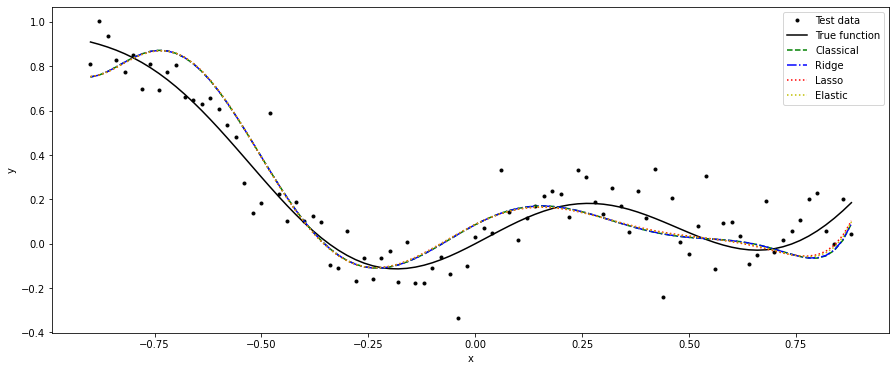

In [38]:
from sklearn import linear_model
from sklearn.metrics import r2_score

N_tot = 10
Legendre = True

# Polynomial of order N based on the training point
X_train = np.ones(obs_x_train.shape)
X_test = np.ones(obs_x_test.shape)
for i in range(1, N_tot+1):
  if Legendre:
    Pn = legendre(i)
    X_train = np.concatenate((X_train, Pn(obs_x_train)), axis=-1)
    X_test = np.concatenate((X_test, Pn(obs_x_test)), axis=-1)
  else:
    X_train = np.concatenate((X_train, obs_x_train**i), axis=-1)
    X_test = np.concatenate((X_test, obs_x_test**i), axis=-1)


plt.figure(figsize=(15, 6))
plt.subplots_adjust(wspace = 0.5)
plt.plot(obs_x_test, obs_y_test, 'k.', label='Test data')
plt.plot(obs_x_test, obs_y_true, 'k-', label='True function')

# Classical linear regression
print('---------------------------')
print('CLASSICAL LINEAR REGRESSION')
my_model = linear_model.LinearRegression()
my_model.fit(X_train, obs_y_train)
y_pred_train = my_model.predict(X_train)
y_pred_test = my_model.predict(X_test)
R2_train = r2_score(obs_y_train, y_pred_train) # Compute the coefficient of determination R2
R2_test = r2_score(obs_y_test, y_pred_test) # Compute the coefficient of determination R2
print(f'The coefficient of determination for training is R2 = {R2_train}')
print(f'The coefficient of determination for testing is R2 = {R2_test}')
plt.plot(obs_x_test, y_pred_test, 'g--', label='Classical')

# Ridge linear regression (TO BE IMPLEMENTED, EXERCISE 3a)
print('---------------------------')
print('RIDGE LINEAR REGRESSION  ')
my_model = linear_model.Ridge(alpha=.0005).fit(X_train, y_train)
y_pred_train = my_model.predict(X_train)
y_pred_test = my_model.predict(X_test)
R2_train = r2_score(y_train, y_pred_train) # Compute the coefficient of determination R2
R2_test = r2_score(y_test, y_pred_test) # Compute the coefficient of determination R2
print(f'The coefficient of determination for training is R2 = {R2_train}')
print(f'The coefficient of determination for testing is R2 = {R2_test}')
plt.plot(obs_x_test, y_pred_test, 'b-.', label='Ridge')

# Lasso linear regression (TO BE IMPLEMENTED, EXERCISE 3b)
print('---------------------------')
print('LASSO LINEAR REGRESSION  ')
my_model = linear_model.Lasso(alpha=0.0001, max_iter=10000).fit(X_train, y_train)
y_pred_train = my_model.predict(X_train)
y_pred_test = my_model.predict(X_test)
R2_train = r2_score(y_train, y_pred_train) # Compute the coefficient of determination R2
R2_test = r2_score(y_test, y_pred_test) # Compute the coefficient of determination R2
print(f'The coefficient of determination for training is R2 = {R2_train}')
print(f'The coefficient of determination for testing is R2 = {R2_test}')
plt.plot(obs_x_test, y_pred_test, 'r:', label='Lasso')

# ElasticNet linear regression (TO BE IMPLEMENTED, EXERCISE 3c)
print('---------------------------')
print('ELASTICNET LINEAR REGRESSION  ')
my_model = linear_model.ElasticNet(alpha=0.0001, l1_ratio=0.5, max_iter=10000).fit(X_train, y_train)
y_pred_train = my_model.predict(X_train)
y_pred_test = my_model.predict(X_test)
R2_train = r2_score(y_train, y_pred_train) # Compute the coefficient of determination R2
R2_test = r2_score(y_test, y_pred_test) # Compute the coefficient of determination R2
print(f'The coefficient of determination for training is R2 = {R2_train}')
print(f'The coefficient of determination for testing is R2 = {R2_test}')
plt.plot(obs_x_test, y_pred_test, 'y:', label='Elastic')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()